In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


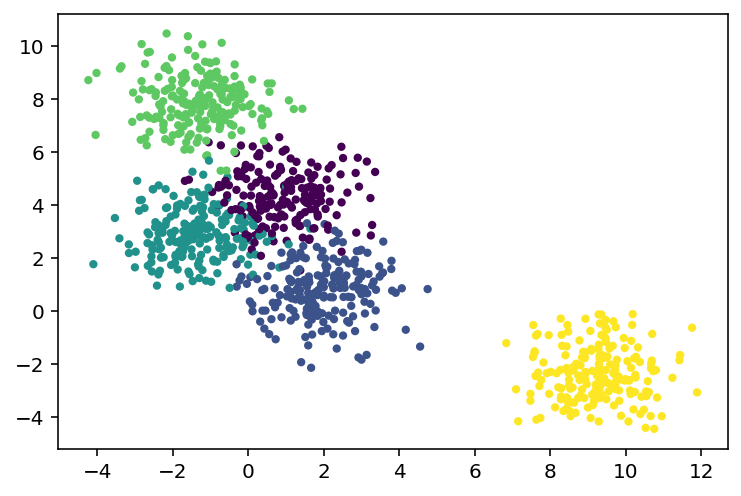

In [2]:
# Create a dataset with K_dataset clusters
K_dataset = 5

X, y = make_blobs(n_samples=1000, centers=K_dataset, n_features=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')

Text(0, 0.5, 'Within-cluster sum of squares')

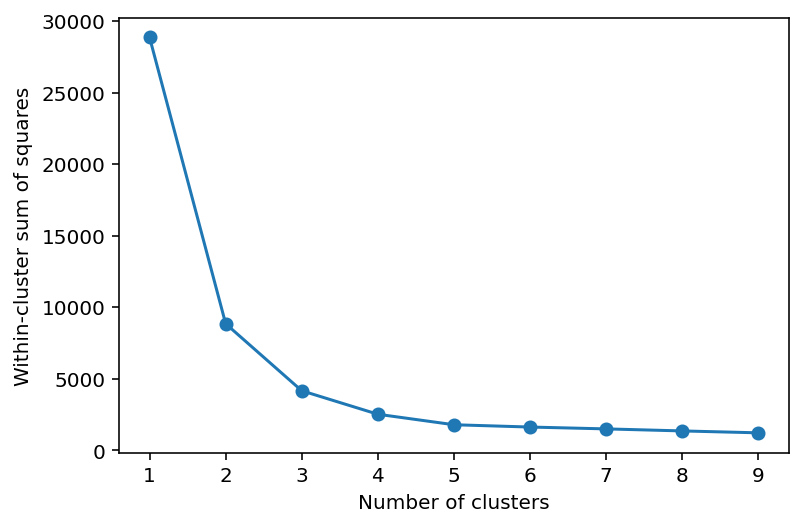

In [3]:
# Fit k-means with different number of clusters
Ks = range(1, 10)
within_cluster_sums = {}
assignments = {}
centroids = {}


for K in Ks:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    within_cluster_sums[K] = kmeans.inertia_
    assignments[K] = kmeans.labels_
    centroids[K] = kmeans.cluster_centers_

# Plot the results
pd.Series(within_cluster_sums).plot(marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

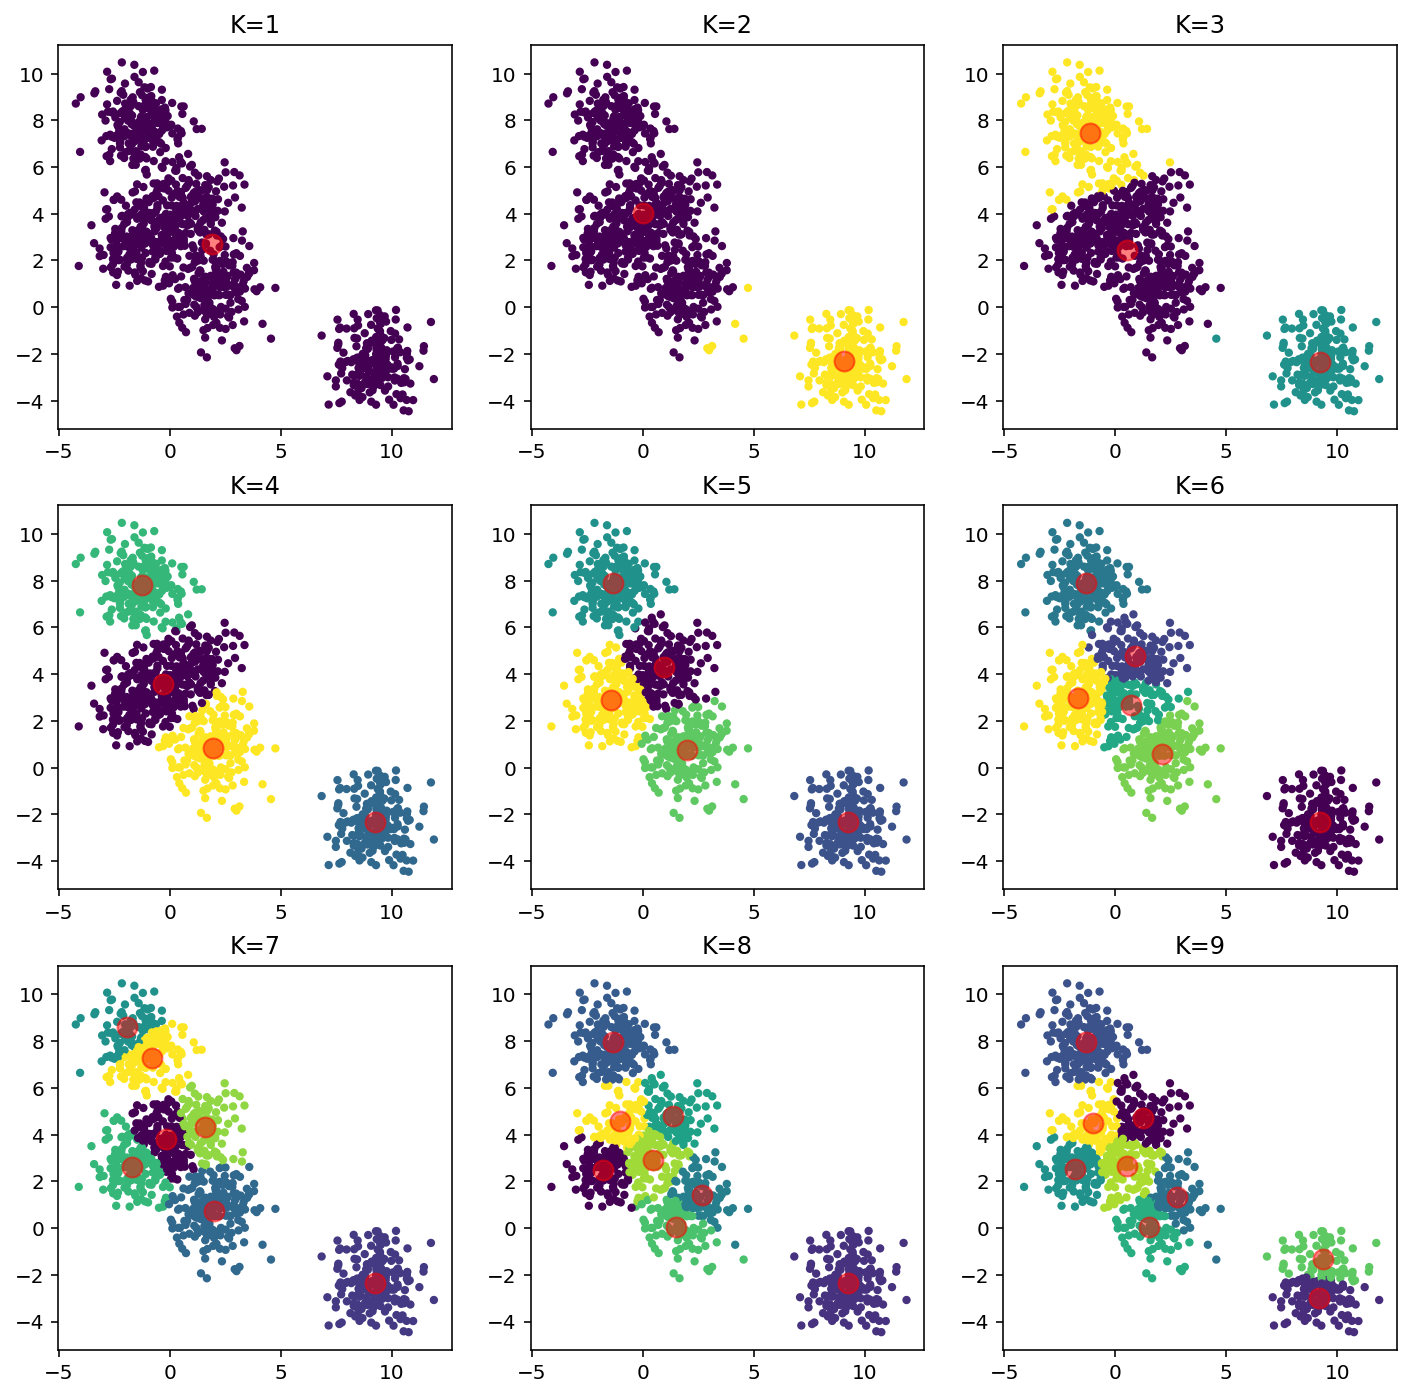

In [15]:
# Plot assignments
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for K, ax in zip(Ks, axes.ravel()):
    ax.scatter(X[:, 0], X[:, 1], c=assignments[K], s=10, cmap='viridis')
    ax.set_title(f'K={K}')
    # Mark centroids
    ax.scatter(centroids[K][:, 0], centroids[K][:, 1], c='red', s=100, alpha=0.5)
